**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.metrics import accuracy_score


import warnings
warnings.simplefilter('ignore')

%matplotlib inline 

# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
df=pd.read_csv("2Classdata.csv")
df.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
*Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization*.

In [3]:
#head and tail
print(df.head())
print('\n')
print(df.tail())

   pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027818            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal  


     pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
305         47.903565            13.616688              36.000000   
306         53.936748            20.721496 

In [4]:
#shape
df.shape

(310, 7)

In [5]:
#datatype
df.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [6]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [7]:
#missing values
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [8]:
# Class values
df['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

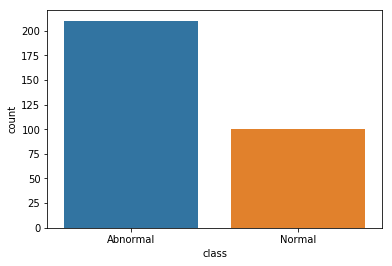

In [9]:
sns.countplot(df['class'])

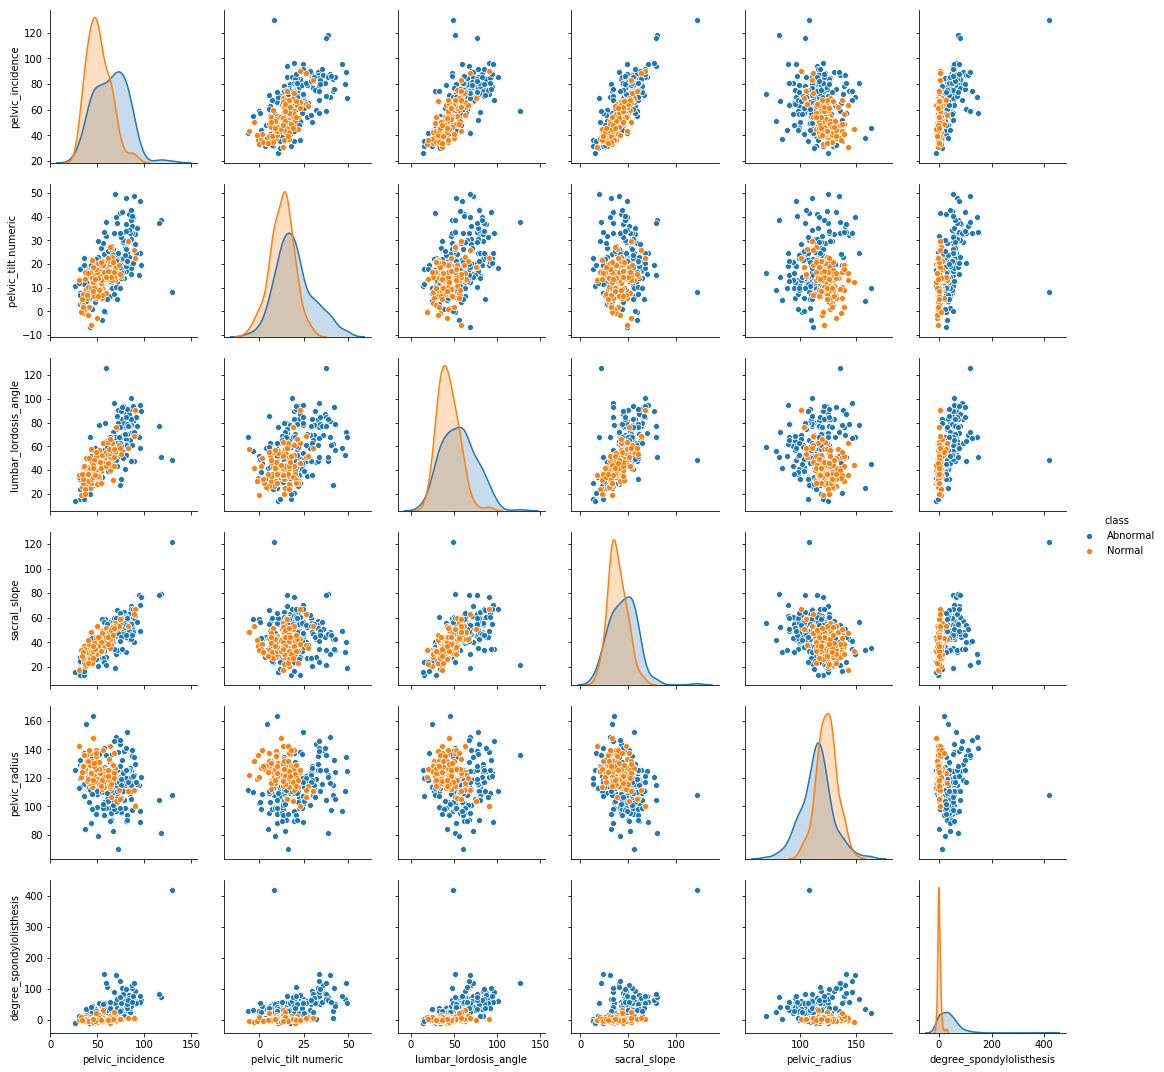

In [10]:
sns.pairplot(df,hue='class')

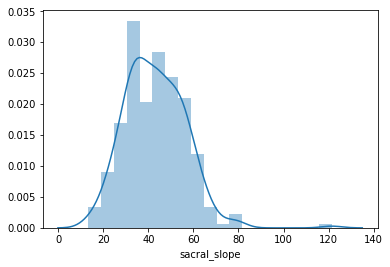

In [11]:
sns.distplot(df.sacral_slope)

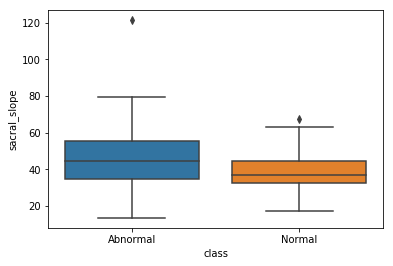

In [12]:
sns.boxplot(y=df.sacral_slope,x='class',data=df)

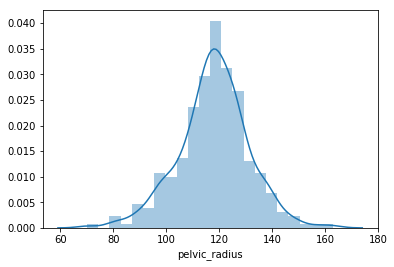

In [13]:
sns.distplot(df.pelvic_radius)

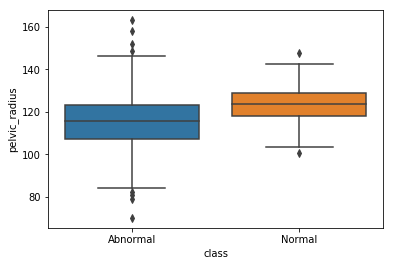

In [14]:
sns.boxplot(y=df.pelvic_radius,x='class',data=df)

# Encode the Class variable to integer.

In [15]:
number=LabelEncoder()
df['class']= number.fit_transform(df['class'].astype('str'))
df.sample(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
189,82.406524,29.276422,77.054565,53.130102,117.042244,62.765348,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
276,51.325464,13.631223,33.258578,37.694240,131.306122,1.788870,1
117,86.041280,38.750670,47.871405,47.290610,122.092954,61.988277,0
190,43.718262,9.811985,52.000000,33.906277,88.434242,40.880923,0
187,60.419932,5.265665,59.814236,55.154267,109.033075,30.265785,0
61,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,0
131,69.781006,13.777465,58.000000,56.003541,118.930666,17.914560,0
258,40.349296,10.194748,37.967747,30.154548,128.009927,0.458901,1
39,52.419385,19.011561,35.872660,33.407825,116.559771,1.694705,0


In [16]:
df.corr()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,-0.353336
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,-0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,-0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,-0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,-0.443687
class,-0.353336,-0.326063,-0.312484,-0.210602,0.309857,-0.443687,1.000000


In [17]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.322581
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.468220
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,1.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,1.000000


In [18]:
df.var()

pelvic_incidence             297.097633
pelvic_tilt numeric          100.166675
lumbar_lordosis_angle        344.253290
sacral_slope                 180.179672
pelvic_radius                177.352531
degree_spondylolisthesis    1410.680476
class                          0.219230
dtype: float64

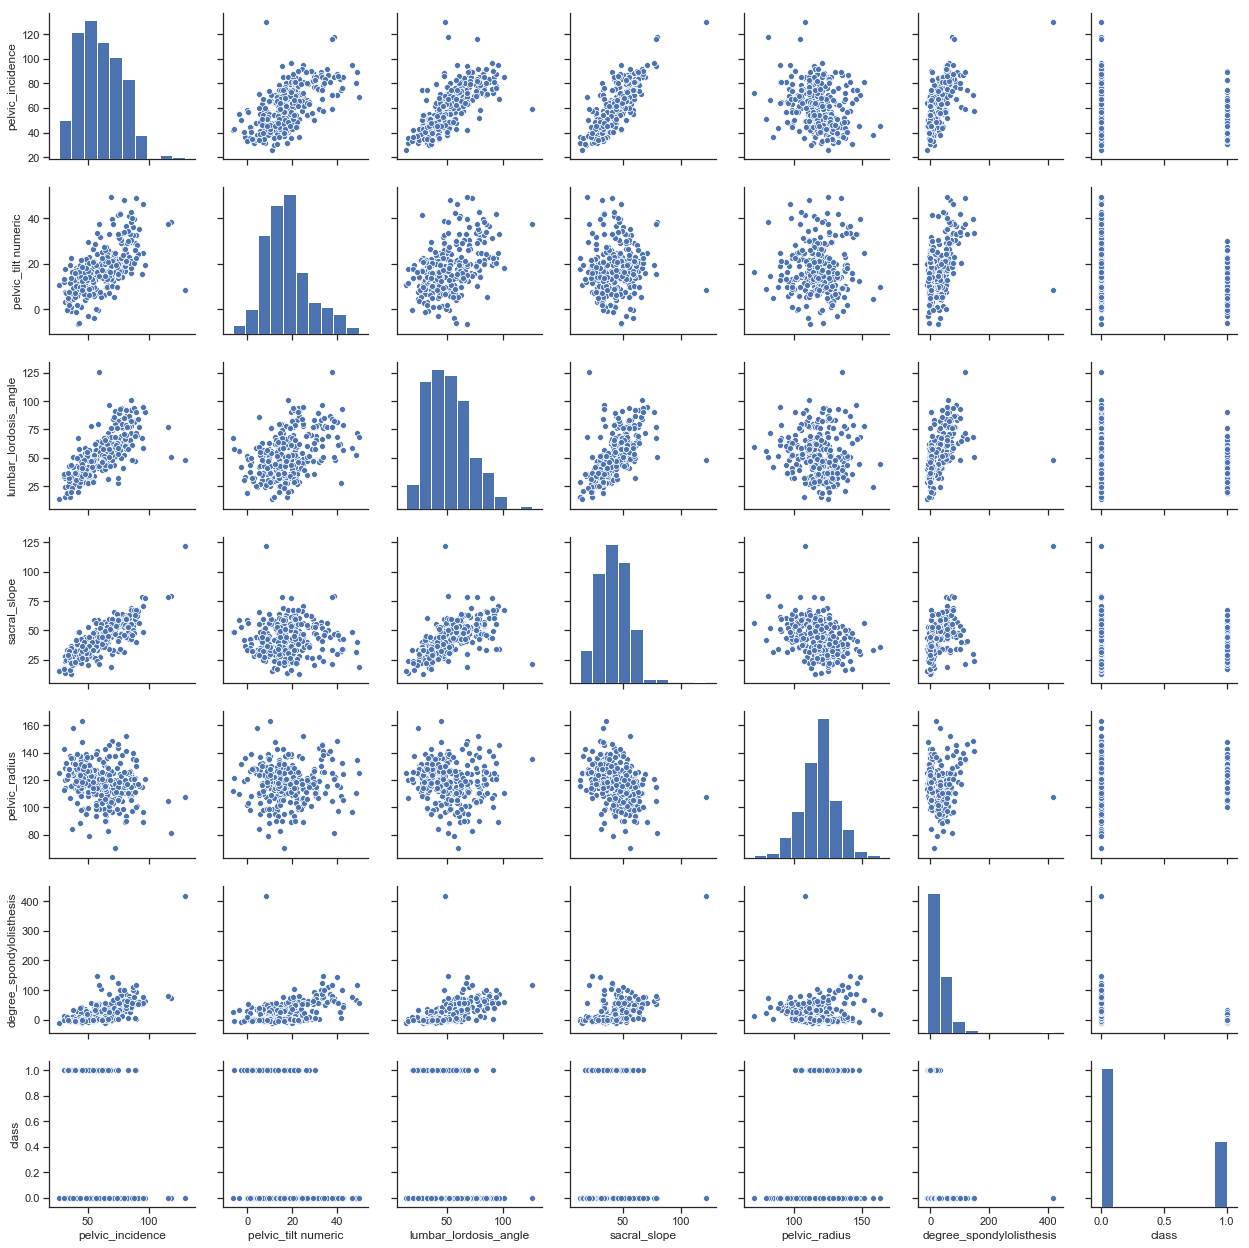

In [19]:
sns.set(style="ticks")
sns.pairplot(df)

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [20]:
x_data=df.drop(['class'],axis=1)
y = df["class"]

In [21]:
x_data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [22]:
y.tail()

305    1
306    1
307    1
308    1
309    1
Name: class, dtype: int32

In [23]:
print(x_data.shape)
print(y.shape)

(310, 6)
(310,)


# Normalize your Data (X) to get values between 0 to 1.

In [24]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

'''
OR

min_max_scaler = MinMaxScaler()
x=min_max_scaler.fit_transform(x_data)

'''

'\nOR\n\nmin_max_scaler = MinMaxScaler()\nx=min_max_scaler.fit_transform(x_data)\n\n'

In [25]:
x.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173


In [26]:
x_data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


# Split the dat as train and test with a ratio of 70:30.

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

In [28]:
print(x_train.shape)
print(x_test.shape)

(217, 6)
(93, 6)


In [29]:
print(y_train.shape)
print(y_test.shape)

(217,)
(93,)


# Build the KNN model using Train Dataset and predict the class on test dataset.

In [30]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)

In [31]:
prediction

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0])

In [32]:
np.array(y_test)

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0])

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [33]:
print("{}nn score: {}".format(5,knn.score(x_test,y_test)))

5nn score: 0.8172043010752689


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

Text(0, 0.5, 'accuracy')

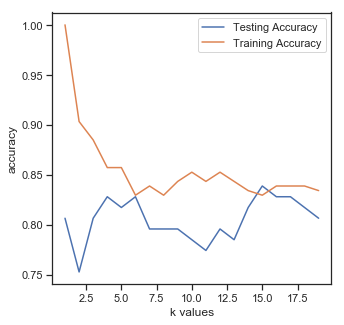

In [34]:
train = []
test = []
for i in range(1,20):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train,y_train)
    train.append(knn2.score(x_train,y_train))
    test.append(knn2.score(x_test,y_test))
plt.figure(figsize=(5,5))   
plt.plot(range(1,20),test, label = 'Testing Accuracy')
plt.plot(range(1,20),train, label = 'Training Accuracy')
plt.legend()
plt.xlabel("k values")
plt.ylabel("accuracy")

# ANSWER

### k=15
### Here k=15 for random state=5 has the highest test accuracy. So we can use the value of k as 15


### Checking range of 1-21 nearest neighbors over 20 random_state where the data is normalized before splitting to test & train sets

Text(0, 0.5, 'Accuracy')

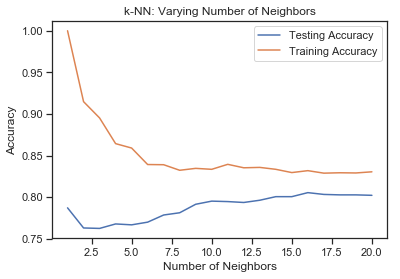

In [35]:
neighbors = np.arange(1,21)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(20):
        x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=j)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        train.append(knn.score(X_train,y_train))
        test.append(knn.score(X_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
    
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

# ANSWER

### k=17
### Here k=17 for a range of 20 random state, has the highest test accuracy. So we can use the value of k as 17


## **As the right approach would be to first split the data into training set and test set. Convert them using any standardization/normalization technique. This way the training set and test set do not influence one another during the process of standardization/normalization.**

### Hence checking range of 1-21 nearest neighbors over 20 random_states where the data is split into test & train set first and then normalized

Text(0, 0.5, 'Accuracy')

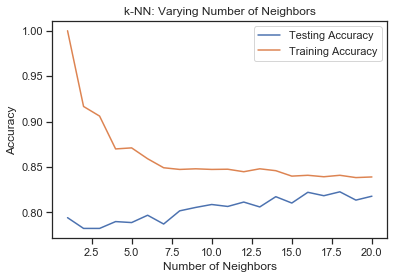

In [36]:
neighbors = np.arange(1,21)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.30,random_state=j)
        min_max_scaler = MinMaxScaler()
        scaledX_train = min_max_scaler.fit_transform(X_train)
        scaledX_test = min_max_scaler.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
  
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

# ANSWER

### k=17
### Here k=17 for a range of 20 random state, has the highest test accuracy. So we can use the value of k as 17


# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [37]:
df1=pd.read_csv("3Classdata.csv")
df1.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [38]:
df1.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

In [39]:
df1.shape

(310, 7)

In [40]:
df1.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64


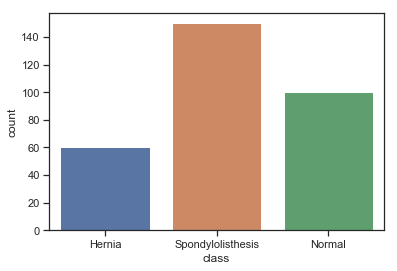

In [42]:
sns.countplot(df1['class'])
print(df1['class'].value_counts())

In [43]:
df1.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [44]:
df1.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [45]:
df1['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

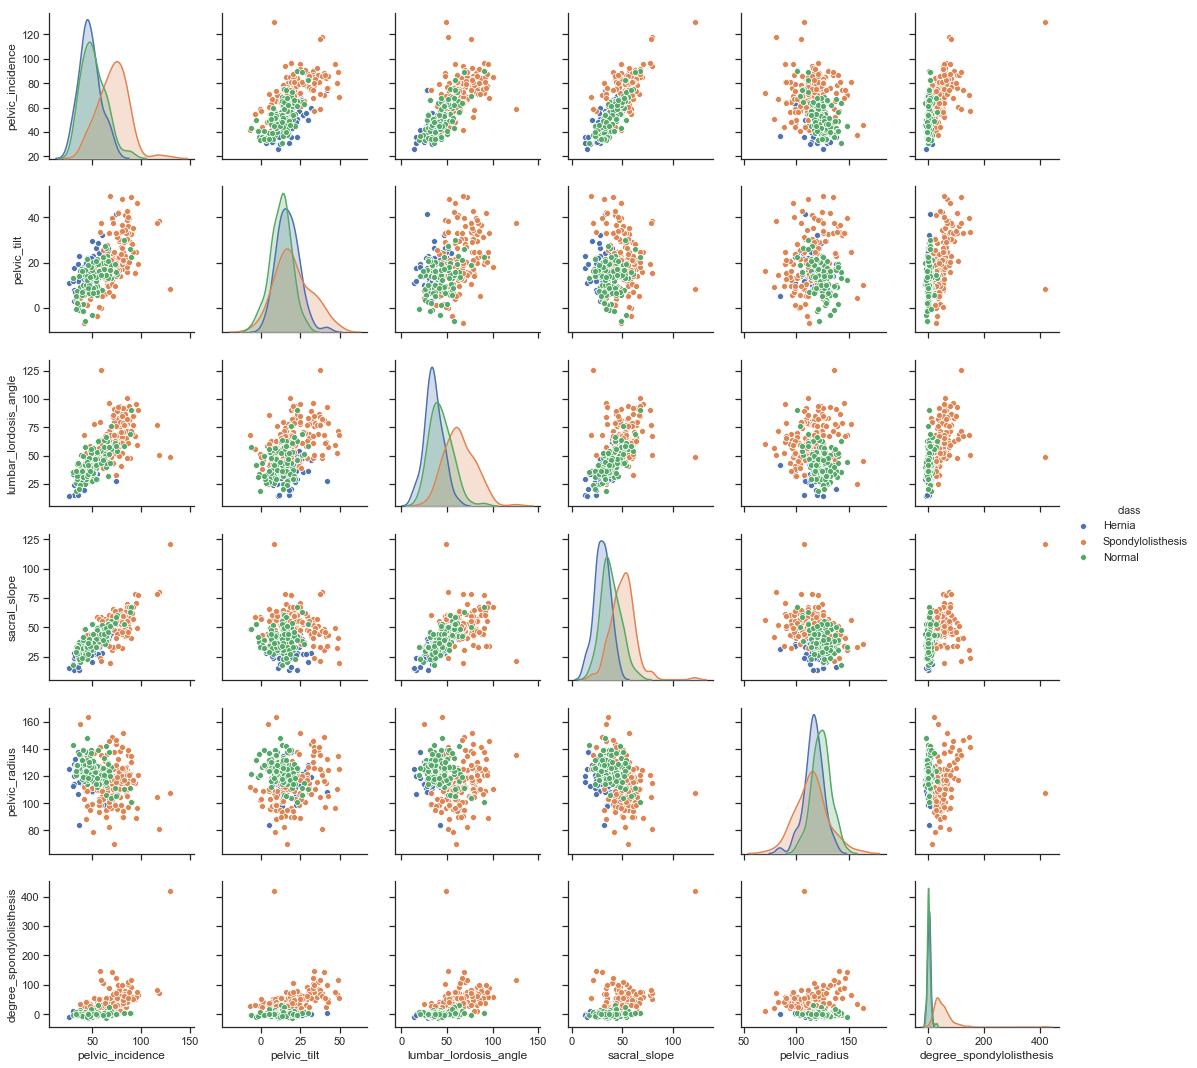

In [46]:
sns.pairplot(df1,hue='class')

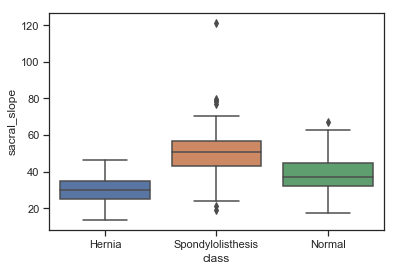

In [47]:
sns.boxplot(y=df.sacral_slope,x='class',data=df1)

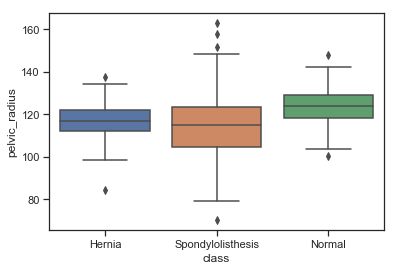

In [48]:
sns.boxplot(y=df.pelvic_radius,x='class',data=df1)

In [49]:
number=LabelEncoder()
df1['class']= number.fit_transform(df1['class'].astype('str'))
df1.sample(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
299,82.905351,29.894119,58.250542,53.011232,110.708958,6.079338,1
19,41.729963,12.254074,30.122586,29.475889,116.585706,-1.244402,0
191,86.472905,40.303766,61.141012,46.169139,97.404189,55.752221,2
143,60.626217,20.595958,64.535262,40.030259,117.225554,104.859247,2
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,2
15,44.318907,12.537992,36.098763,31.780915,124.115836,5.415825,0
270,51.311771,8.875541,57.000000,42.436230,126.472258,-2.144044,1
35,31.484218,7.826221,24.284818,23.657997,113.833145,4.393080,0
64,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,2
182,75.437748,31.539454,89.600000,43.898294,106.829590,54.965789,2


In [50]:
df1.corr()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.590025
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.205158
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.636490
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.604681
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,-0.133424
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.588541
class,0.590025,0.205158,0.636490,0.604681,-0.133424,0.588541,1.000000


In [51]:
df1.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,1.290323
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.771396
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,1.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,1.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,2.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,2.000000


In [52]:
df1.var()

pelvic_incidence             297.097633
pelvic_tilt                  100.166675
lumbar_lordosis_angle        344.253290
sacral_slope                 180.179672
pelvic_radius                177.352531
degree_spondylolisthesis    1410.680476
class                          0.595052
dtype: float64

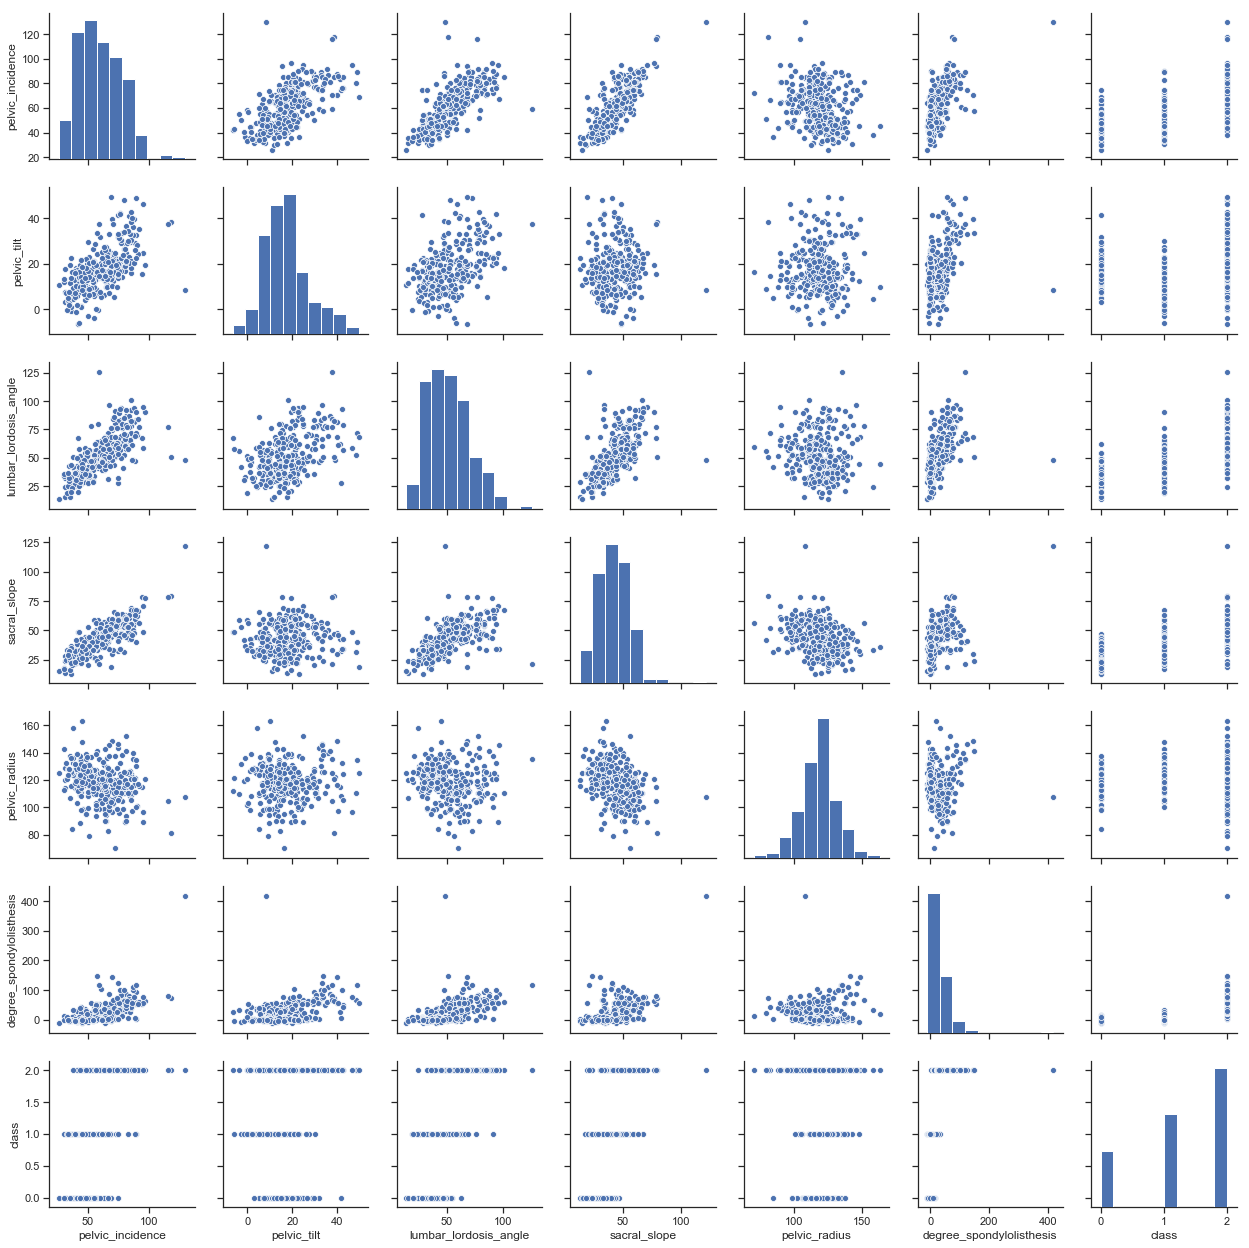

In [53]:
sns.set(style="ticks")
sns.pairplot(df1)

In [54]:
x_data=df1.drop(['class'],axis=1)
y = df1["class"]

In [55]:
x_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [56]:
y.tail()

305    1
306    1
307    1
308    1
309    1
Name: class, dtype: int32

In [57]:
print(x_data.shape)
print(y.shape)

(310, 6)
(310,)


In [58]:
min_max_scaler = MinMaxScaler()
x=min_max_scaler.fit_transform(x_data)

In [59]:
x

array([[0.35568788, 0.51989984, 0.22917997, 0.2508573 , 0.30746116,
        0.02514839],
       [0.12450104, 0.2967831 , 0.09857833, 0.14462935, 0.47664891,
        0.03636497],
       [0.41166648, 0.51393229, 0.32299466, 0.30766054, 0.38609692,
        0.0175229 ],
       ...,
       [0.34043781, 0.52244298, 0.28789745, 0.23490726, 0.59779618,
        0.01943732],
       [0.18425678, 0.27235174, 0.24684569, 0.21462279, 0.52117504,
        0.02624045],
       [0.07420202, 0.20770855, 0.20261992, 0.14251659, 0.57924032,
        0.02527676]])

In [60]:
x_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [62]:
print(x_train.shape)
print(y_train.shape)

(217, 6)
(217,)


In [63]:
print(x_test.shape)
print(x_test.shape)

(93, 6)
(93, 6)


In [64]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)

In [65]:
print(prediction)
print(np.array(y_test))

[2 1 1 1 2 1 1 2 0 0 0 2 0 2 2 1 1 1 0 1 0 0 2 1 1 2 1 1 1 2 1 2 2 0 1 0 2
 2 2 0 0 1 2 2 2 2 2 1 2 2 2 2 2 2 0 2 2 1 2 1 2 1 2 1 0 1 2 2 1 2 2 1 1 2
 1 2 0 0 0 2 1 2 1 2 1 0 0 1 2 0 2 1 2]
[2 1 1 1 2 1 1 2 2 0 0 2 0 2 2 1 1 1 0 0 0 1 2 1 1 1 1 1 1 2 2 2 2 0 2 0 2
 2 2 1 0 1 2 2 2 2 2 0 2 2 2 1 2 2 2 2 2 2 2 1 2 0 2 1 2 1 2 2 2 2 2 0 1 2
 2 2 0 0 1 2 1 2 1 2 1 0 0 0 2 0 2 1 2]


In [66]:
print("{}nn score: {}".format(11,knn.score(x_test,y_test)))

11nn score: 0.8064516129032258


Text(0, 0.5, 'accuracy')

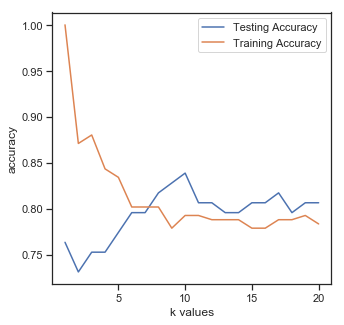

In [67]:
train = []
test = []
for i in range(1,21):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train,y_train)
    train.append(knn2.score(x_train,y_train))
    test.append(knn2.score(x_test,y_test))
plt.figure(figsize=(5,5))
plt.plot(range(1,21),test, label = 'Testing Accuracy')
plt.plot(range(1,21),train, label = 'Training Accuracy')
plt.legend()
plt.xlabel("k values")
plt.ylabel("accuracy")

# ANSWER

### k=17,19
### We can use k=17 or k=19 as the best value of k

## As the right approach would be to first split the data into training set and test set. Convert them using any standardization/normalization technique. This way the training set and test set do not influence one another during the process of standardization/normalization.
### Hence checking range of 1-21 nearest neighbors for 20 random_state where the data is split into test & train set first and then normalized

Text(0, 0.5, 'Accuracy')

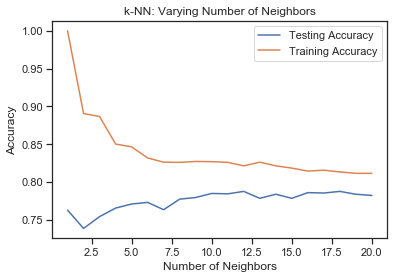

In [68]:
neighbors = np.arange(1,21)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.30,random_state=j)
        min_max_scaler = MinMaxScaler()
        scaledX_train = min_max_scaler.fit_transform(X_train)
        scaledX_test = min_max_scaler.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
  
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

# ANSWER

### k=17
### We can use k=17 as the best value of k